In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [174]:
df = pd.read_csv("compositeData.csv")
df

,fibre_length,basalt_fiber_content,curaua_fiber_content,tensile_strength
0,4,100,0,50.38
1,4,100,0,30.36
2,4,75,25,25.24
3,4,75,25,27.22
4,4,75,25,23.01
5,4,50,50,23.71
6,4,50,50,26.87
7,4,50,50,22.89
8,4,25,75,32.67
9,4,25,75,32.11


In [175]:
df.describe()

,fibre_length,basalt_fiber_content,curaua_fiber_content,tensile_strength
count,45.000000,45.00000,45.00000,45.000000
mean,7.644444,50.00000,50.00000,28.121778
std,3.053728,36.14994,36.14994,7.342803
min,4.000000,0.00000,0.00000,10.540000
25%,4.000000,25.00000,25.00000,23.710000
50%,8.000000,50.00000,50.00000,27.870000
75%,8.000000,75.00000,75.00000,32.110000
max,12.000000,100.00000,100.00000,50.380000


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fibre_length          45 non-null     int64  
 1   basalt_fiber_content  45 non-null     int64  
 2   curaua_fiber_content  45 non-null     int64  
 3   tensile_strength      45 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.5 KB


In [177]:
df.columns

Index(['fibre_length', 'basalt_fiber_content', 'curaua_fiber_content',
       'tensile_strength'],
      dtype='object')

In [178]:
px.box(df)

Text(0.5, 1.0, '\nRaw Data Correlation Matrix\n')

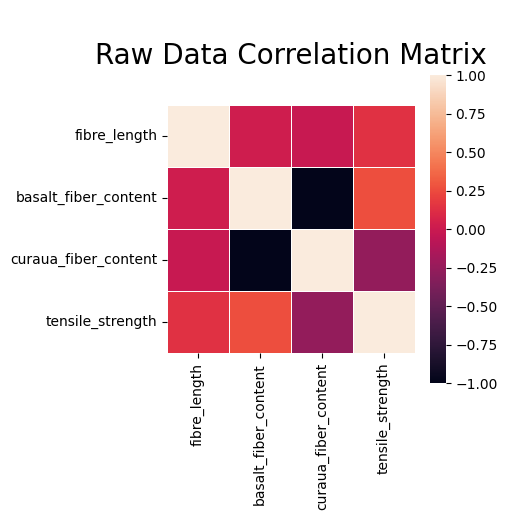

In [179]:
plt.figure(figsize=(df.corr().shape))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(df.corr(), linewidths=.5, square = True)
plt.title("\nRaw Data Correlation Matrix\n", size = 20)

/Users/Sid/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning:

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.



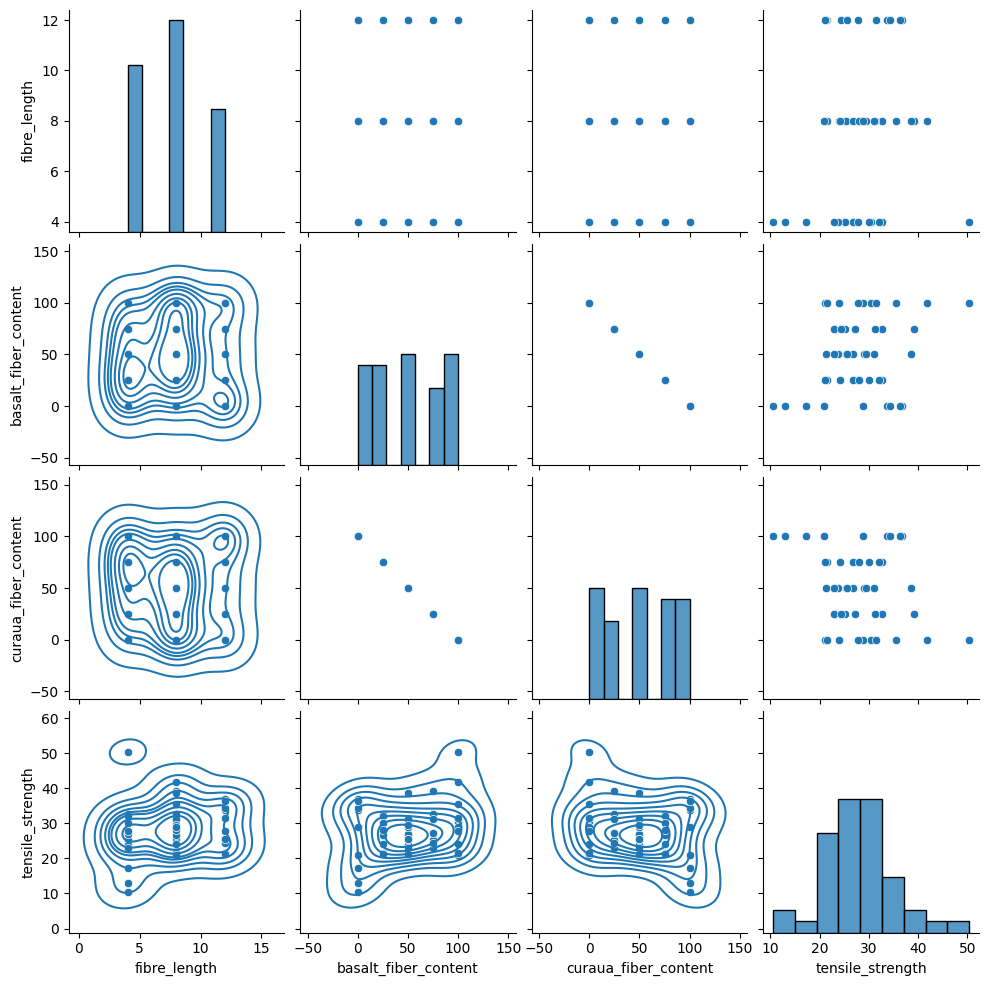

In [180]:
pairGrid = sns.pairplot(data = df)
pairGrid.map_lower(sns.kdeplot)

In [181]:
fig = px.scatter_3d(df, x='fibre_length', y='basalt_fiber_content', z='curaua_fiber_content', color='tensile_strength')
fig.show()

In [182]:
fig = px.scatter_3d(df, x='tensile_strength', y='basalt_fiber_content', z='curaua_fiber_content', color='fibre_length')
fig.show()

In [183]:
dataStuff = df[['fibre_length', 'basalt_fiber_content', 'curaua_fiber_content']]
targetStuff = df['tensile_strength']

In [184]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model

In [185]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [186]:
yPred = modelLR.predict(xTest)
yPred

array([28.897658  , 28.33219196, 28.33219196, 25.7034481 , 32.0918679 ,
       25.7034481 , 29.36383086, 24.57251602, 26.16962096])

In [187]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  7.428739387933987
Mean Squared Error: 55.18616889384183
R-squared: -0.07443982552013684


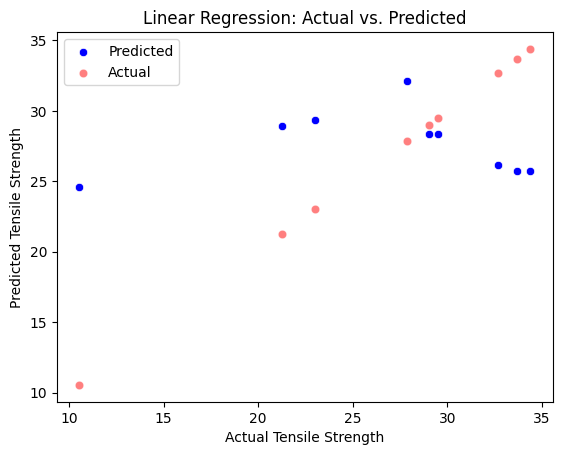

In [188]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model

In [189]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [190]:
yPred = modelRR.predict(xTest)
yPred

array([28.89546184, 28.33192185, 28.33192185, 25.70120522, 32.08971846,
       25.70120522, 29.36551018, 24.57412525, 26.17125356])

In [191]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  7.429258149785224
Mean Squared Error: 55.193876656150174
R-squared: -0.07458989078025047


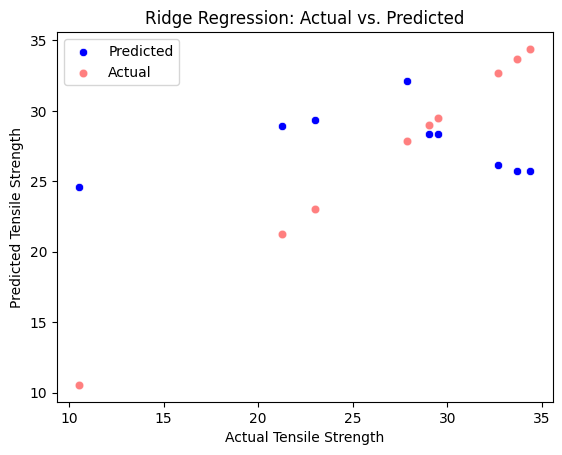

In [192]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model

In [193]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [194]:
yPred = modelLSR.predict(xTest)
yPred

array([28.33963047, 28.26503699, 28.26503699, 25.16381267, 31.51544827,
       25.16381267, 29.77835242, 25.01462572, 26.60253462])

In [195]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  7.567160493520849
Mean Squared Error: 57.2619179347027
R-squared: -0.114853347277307


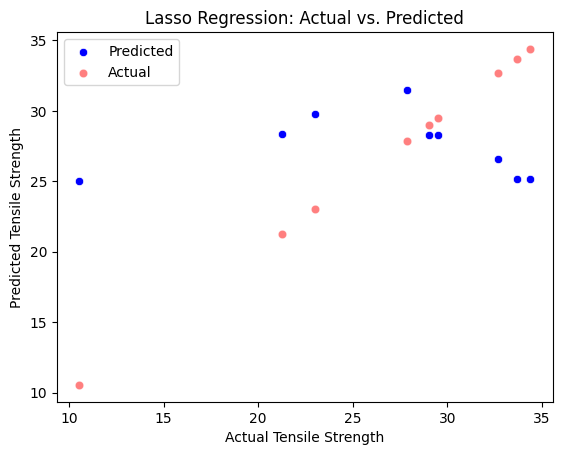

In [196]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model

In [197]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [198]:
yPred = modelEN.predict(xTest)
yPred

array([28.59749638, 28.29601372, 28.29601372, 25.41203661, 31.78295614,
       25.41203661, 29.58726094, 24.80907129, 26.40180117])

In [199]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  7.50042144048129
Mean Squared Error: 56.25632178483143
R-squared: -0.09527502587054637


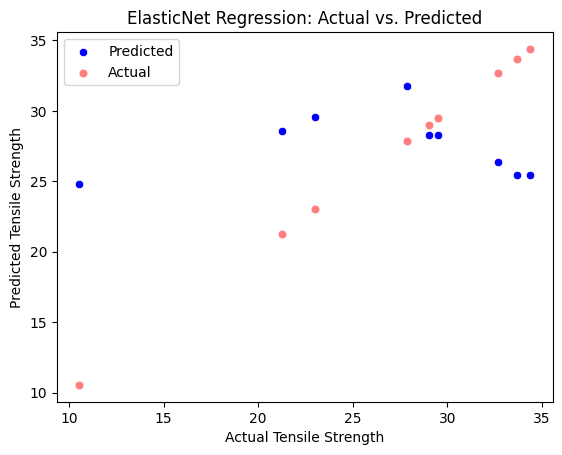

In [200]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model

In [201]:
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  7.428739387933987
Mean Squared Error: 55.18616889384184
R-squared: -0.07443982552013706


Poly Features Degree:  2
Root Mean Square Error:  5.839834276191594
Mean Squared Error: 34.103664373382195
R-squared: 0.3360232113698519


Poly Features Degree:  3
Root Mean Square Error:  5.165081620354048
Mean Squared Error: 26.678068144919198
R-squared: 0.48059487626364494


Poly Features Degree:  4
Root Mean Square Error:  3.401164116669847
Mean Squared Error: 11.567917348522581
R-squared: 0.7747799612347269


Poly Features Degree:  5
Root Mean Square Error:  3.085003502151584
Mean Squared Error: 9.517246608287536
R-squared: 0.8147052243305541


Poly Features Degree:  6
Root Mean Square Error:  3.080414985270776
Mean Squared Error: 9.488956481480754
R-squared: 0.8152560152174644


Poly Features Degree:  7
Root Mean Square Error:  3.0804149852710814
Mean Squared Error: 9.488956481482637
R-squared: 0.8152560152174277


Poly Features Degree:  8
Ro

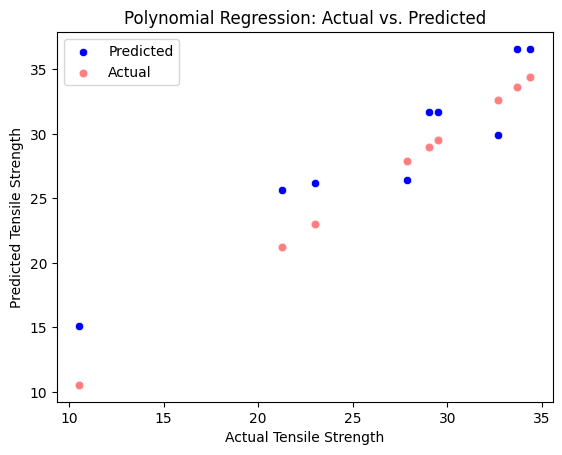

In [202]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model

In [203]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [204]:
yPred = modelKN.predict(xTest)
yPred

array([31.8       , 31.71333333, 31.71333333, 31.36666667, 27.24333333,
       31.36666667, 28.35333333, 17.03666667, 29.92666667])

In [205]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  4.902825589946282
Mean Squared Error: 24.037698765432104
R-squared: 0.5320011991207729


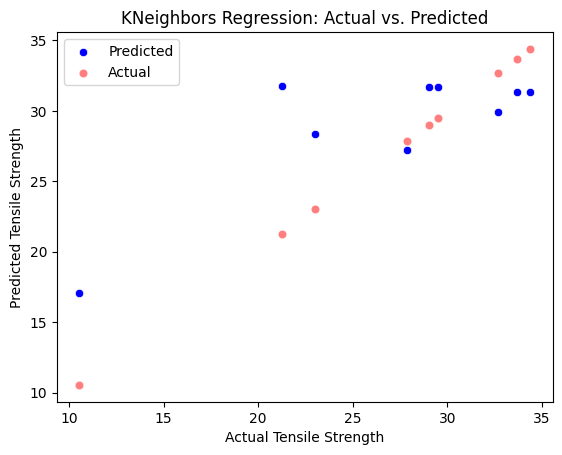

In [206]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model

In [207]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [208]:
yPred = modelDT.predict(xTest)
yPred

array([25.65      , 31.71333333, 31.71333333, 36.595     , 26.455     ,
       36.595     , 26.23      , 15.1       , 29.92666667])

In [209]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  3.0804149852708935
Mean Squared Error: 9.488956481481479
R-squared: 0.8152560152174503


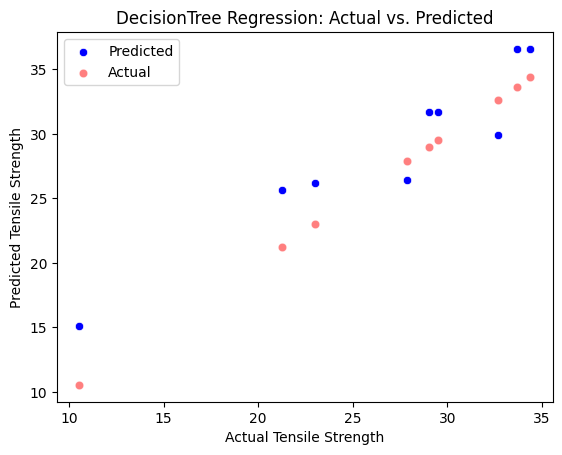

In [210]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model

In [211]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [212]:
yPred = modelRF.predict(xTest)
yPred

array([26.10417833, 31.77278   , 31.77278   , 34.95426333, 26.46847   ,
       34.95426333, 27.30111333, 17.13378333, 29.51219016])

In [213]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  3.5261420680230153
Mean Squared Error: 12.433677883881629
R-squared: 0.7579241508532747


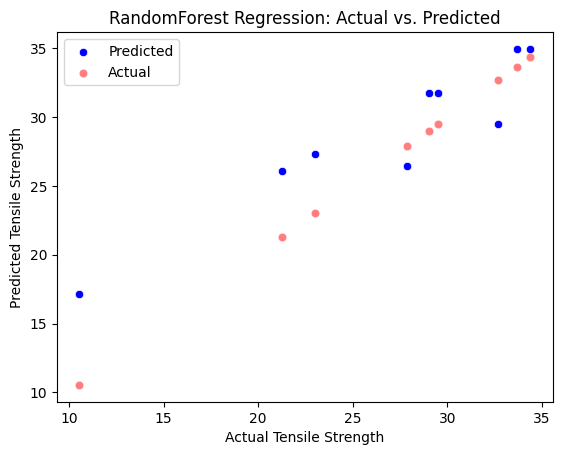

In [214]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model

In [215]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [216]:
yPred = modelSVR.predict(xTest)
yPred

array([26.7507989 , 26.75582383, 26.75582383, 27.46050291, 28.90469784,
       27.46050291, 27.84853127, 27.43874895, 26.85897323])

In [217]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  7.252955284034097
Mean Squared Error: 52.60536035219812
R-squared: -0.02419311452777473


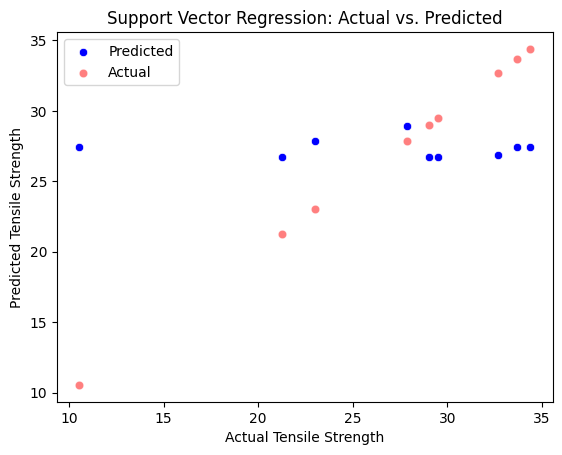

In [218]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg Model

In [219]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [220]:
yPred = modelGBR.predict(xTest)
yPred

array([25.71181741, 31.54740627, 31.54740627, 36.49305978, 26.45297316,
       36.49305978, 26.75196409, 15.44766411, 29.39415521])

In [221]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  3.2230763249268324
Mean Squared Error: 10.388220996303856
R-squared: 0.7977479035335094


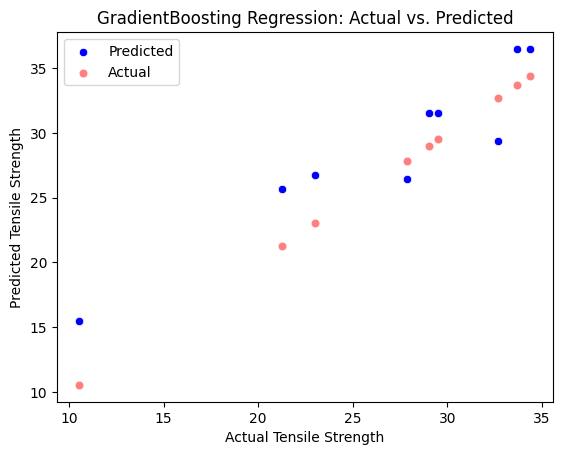

In [222]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [223]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [224]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [225]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared)')
fig.show()

In [226]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error)')
fig.show()

In [227]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error)')
fig.show()

In [228]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([30.96093581, 30.96093581, 29.36383086, 29.36383086, 29.36383086,
        27.76672591, 27.76672591, 27.76672591, 26.16962096, 26.16962096,
        26.16962096, 26.16962096, 24.57251602, 24.57251602, 24.57251602,
        31.52640185, 31.52640185, 31.52640185, 31.52640185, 31.52640185,
        29.9292969 , 29.9292969 , 29.9292969 , 28.33219196, 28.33219196,
        28.33219196, 28.33219196, 28.33219196, 26.73508701, 26.73508701,
        26.73508701, 26.73508701, 25.13798206, 25.13798206, 32.0918679 ,
        32.0918679 , 32.0918679 , 30.49476295, 28.897658  , 28.897658  ,
        27.30055305, 25.7034481 , 25.7034481 , 25.7034481 , 25.7034481 ]),
 array([30.96263849, 30.96263849, 29.36551018, 29.36551018, 29.36551018,
        27.76838187, 27.76838187, 27.76838187, 26.17125356, 26.17125356,
        26.17125356, 26.17125356, 24.57412525, 24.57412525, 24.57412525,
        31.52617847, 31.52617847, 31.52617847, 31.52617847, 31.52617847,
        29.92905016, 29.92905016, 29.92905016, 28

In [229]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [230]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [231]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

,Predicted Values,Models,Index
0,30.960936,Linear Reg,0
1,30.960936,Linear Reg,1
2,29.363831,Linear Reg,2
3,29.363831,Linear Reg,3
4,29.363831,Linear Reg,4
...,...,...,...
490,21.150000,Actual Targets,40
491,33.670000,Actual Targets,41
492,36.830000,Actual Targets,42
493,34.400000,Actual Targets,43


In [232]:
fig = px.line(combinedDf, x='Index', y='Predicted Values', color='Models')
fig.show()

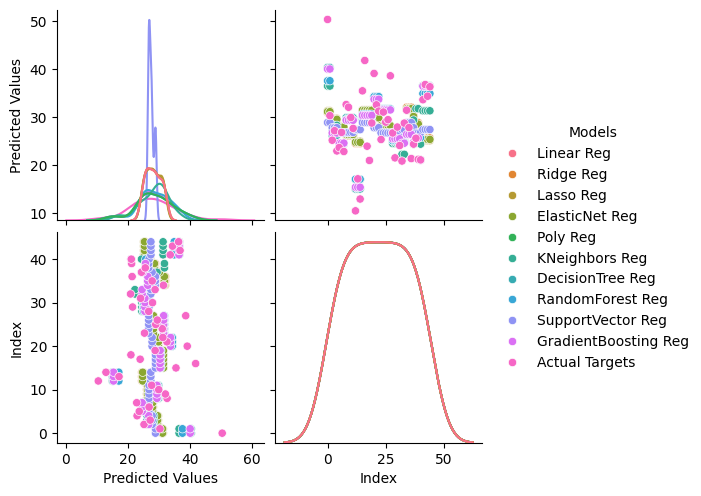

In [233]:
pairGrid = sns.pairplot(data=combinedDf, hue="Models", diag_kind="scatter")
pairGrid.map_diag(sns.kdeplot)
plt.show()